In [3]:
import numpy as np
import pandas as pd

In [4]:
order_products = pd.read_csv('order_products__prior.csv')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
prod = pd.read_csv('products.csv')
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
data = pd.merge(order_products,prod,how='inner',on='product_id')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [7]:
data.order_id.nunique()

3214874

In [8]:
data.product_name.nunique()

49677

In [9]:
sampled_order_ids_1 = data['order_id'].drop_duplicates().sample(frac=0.001, random_state=42)

# Filter the DataFrame to include only rows with the sampled order IDs
data_sampled_1 = data[data['order_id'].isin(sampled_order_ids_1)]

# Data Processing

In [11]:
import dask.dataframe as dd

data_cleaned = data_sampled_1[['order_id', 'product_name']].dropna()
data_cleaned.head(20)

,order_id,product_name
11830,1229,Vine Ripe Tomatoes
11831,1229,Organic Large Grade A Brown Eggs
11832,1229,Banana
11833,1229,Whole Grains Health Nut Bread
11834,1229,Flip™ Low-Fat Key Lime Crumble Greek Yogurt
11835,1229,Peanut Butter Crunch Cereal
11836,1229,Organic Fat Free Milk
30320,3144,Orange Bell Pepper
30321,3144,Whole Grain Oat Flour
30322,3144,Banana


In [12]:
data_cleaned.shape

(32645, 2)

In [13]:
data_cleaned.groupby(['order_id', 'product_name'])['product_name'].count()

order_id  product_name                               
1229      Banana                                         1
          Flip™ Low-Fat Key Lime Crumble Greek Yogurt    1
          Organic Fat Free Milk                          1
          Organic Large Grade A Brown Eggs               1
          Peanut Butter Crunch Cereal                    1
                                                        ..
3417824   White Horseradish                              1
3418958   Chocolate Peanut Crisp Protein Bar             1
          Organic Whole Milk                             1
          Vanilla Almond Breeze Almond Milk              1
          Whole Milk Greek Plain                         1
Name: product_name, Length: 32645, dtype: int64

In [14]:
data_cleaned.groupby(['order_id', 'product_name'])['product_name'].count().unstack()

product_name,#2 Coffee Filters,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Mango Fruit Bar,...,Zucchini Squash,"\""Constant Comment\"" Decaffeinated Black Tea Blend","\""Mokaccino\"" Milk + Blue Bottle Coffee Chocolate",gel hand wash sea minerals,go fresh Cool Moisture Beauty,of Hanover 100 Calorie Pretzels Mini,smart Blend Chicken & Rice Formula Dry Dog Food,smartwater® Electrolyte Enhanced Water,with Crispy Almonds Cereal,with Olive Oil Mayonnaise
order_id,,,,,,,,,,,,,,,,,,,,,
1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3413005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3416240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
basket = (data_cleaned.groupby(['order_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [16]:
basket = (data_cleaned.groupby(['order_id', 'product_name'])['product_name'].count().unstack().fillna(0))

In [17]:
basket.shape

(3215, 9224)

In [18]:
basket.head()

product_name,#2 Coffee Filters,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Mango Fruit Bar,...,Zucchini Squash,"\""Constant Comment\"" Decaffeinated Black Tea Blend","\""Mokaccino\"" Milk + Blue Bottle Coffee Chocolate",gel hand wash sea minerals,go fresh Cool Moisture Beauty,of Hanover 100 Calorie Pretzels Mini,smart Blend Chicken & Rice Formula Dry Dog Food,smartwater® Electrolyte Enhanced Water,with Crispy Almonds Cereal,with Olive Oil Mayonnaise
order_id,,,,,,,,,,,,,,,,,,,,,
1229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3215 entries, 1229 to 3418958
Columns: 9224 entries, #2 Coffee Filters to with Olive Oil Mayonnaise
dtypes: float64(9224)
memory usage: 226.3 MB


In [20]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

basket_sets = basket.map(encode_units)

In [21]:
basket_sets.head()

product_name,#2 Coffee Filters,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Mango Fruit Bar,...,Zucchini Squash,"\""Constant Comment\"" Decaffeinated Black Tea Blend","\""Mokaccino\"" Milk + Blue Bottle Coffee Chocolate",gel hand wash sea minerals,go fresh Cool Moisture Beauty,of Hanover 100 Calorie Pretzels Mini,smart Blend Chicken & Rice Formula Dry Dog Food,smartwater® Electrolyte Enhanced Water,with Crispy Almonds Cereal,with Olive Oil Mayonnaise
order_id,,,,,,,,,,,,,,,,,,,,,
1229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
basket_sets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3215 entries, 1229 to 3418958
Columns: 9224 entries, #2 Coffee Filters to with Olive Oil Mayonnaise
dtypes: bool(9224)
memory usage: 28.3 MB


# Market basket Analysis Visualization

In [24]:
pd.set_option("display.max_rows", 200)
support = pd.DataFrame(basket_sets.mean().sort_values(ascending=False))
support.head(200)

,0
product_name,
Banana,0.145568
Bag of Organic Bananas,0.116019
Organic Strawberries,0.089580
Organic Baby Spinach,0.074650
Organic Hass Avocado,0.071540
Organic Avocado,0.051944
Large Lemon,0.049767
Limes,0.046967
Organic Whole Milk,0.046656


In [25]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.014619,(100% Raw Coconut Water)
1,0.019907,(100% Whole Wheat Bread)
2,0.032348,(Apple Honeycrisp Organic)
3,0.021462,(Asparagus)
4,0.116019,(Bag of Organic Bananas)
5,0.145568,(Banana)
6,0.019285,(Blueberries)
7,0.014308,(Boneless Skinless Chicken Breasts)
8,0.012442,(Broccoli Crown)
9,0.017729,(Bunched Cilantro)


In [26]:
pd.set_option("display.max_rows", 250)
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets
5,0.145568,(Banana)
4,0.116019,(Bag of Organic Bananas)
70,0.089580,(Organic Strawberries)
32,0.074650,(Organic Baby Spinach)
52,0.071540,(Organic Hass Avocado)
29,0.051944,(Organic Avocado)
24,0.049767,(Large Lemon)
26,0.046967,(Limes)
73,0.046656,(Organic Whole Milk)
61,0.042924,(Organic Raspberries)


In [27]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

num_itemsets = len(basket_sets)

rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric='lift',min_threshold=2)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(Large Lemon),(Banana),0.049767,0.145568,0.015863,0.318750,2.189704,1.0,0.008619,1.254213,0.571772,0.088388,0.202687,0.213862
7,(Organic Avocado),(Banana),0.051944,0.145568,0.016174,0.311377,2.139055,1.0,0.008613,1.240784,0.561680,0.089194,0.194058,0.211244
2,(Organic Raspberries),(Bag of Organic Bananas),0.042924,0.116019,0.012442,0.289855,2.498349,1.0,0.007462,1.244790,0.626633,0.084926,0.196652,0.198547
12,(Organic Raspberries),(Organic Strawberries),0.042924,0.089580,0.011198,0.260870,2.912138,1.0,0.007352,1.231745,0.686058,0.092308,0.188143,0.192935
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.071540,0.116019,0.017729,0.247826,2.136088,1.0,0.009429,1.175235,0.572835,0.104396,0.149107,0.200321
9,(Limes),(Large Lemon),0.046967,0.049767,0.010264,0.218543,4.391349,1.0,0.007927,1.215976,0.810339,0.118705,0.177616,0.212397
11,(Organic Hass Avocado),(Organic Strawberries),0.071540,0.089580,0.014930,0.208696,2.329710,1.0,0.008521,1.150531,0.614740,0.102128,0.130836,0.187681
8,(Large Lemon),(Limes),0.049767,0.046967,0.010264,0.206250,4.391349,1.0,0.007927,1.200671,0.812726,0.118705,0.167132,0.212397
10,(Organic Strawberries),(Organic Hass Avocado),0.089580,0.071540,0.014930,0.166667,2.329710,1.0,0.008521,1.114152,0.626922,0.102128,0.102457,0.187681
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.116019,0.071540,0.017729,0.152815,2.136088,1.0,0.009429,1.095936,0.601658,0.104396,0.087538,0.200321


In [28]:
rules.sort_values(by= ['support','lift'], ascending = [False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.116019,0.071540,0.017729,0.152815,2.136088,1.0,0.009429,1.095936,0.601658,0.104396,0.087538,0.200321
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.071540,0.116019,0.017729,0.247826,2.136088,1.0,0.009429,1.175235,0.572835,0.104396,0.149107,0.200321
7,(Organic Avocado),(Banana),0.051944,0.145568,0.016174,0.311377,2.139055,1.0,0.008613,1.240784,0.561680,0.089194,0.194058,0.211244
6,(Banana),(Organic Avocado),0.145568,0.051944,0.016174,0.111111,2.139055,1.0,0.008613,1.066563,0.623225,0.089194,0.062409,0.211244
4,(Large Lemon),(Banana),0.049767,0.145568,0.015863,0.318750,2.189704,1.0,0.008619,1.254213,0.571772,0.088388,0.202687,0.213862
5,(Banana),(Large Lemon),0.145568,0.049767,0.015863,0.108974,2.189704,1.0,0.008619,1.066449,0.635881,0.088388,0.062309,0.213862
10,(Organic Strawberries),(Organic Hass Avocado),0.089580,0.071540,0.014930,0.166667,2.329710,1.0,0.008521,1.114152,0.626922,0.102128,0.102457,0.187681
11,(Organic Hass Avocado),(Organic Strawberries),0.071540,0.089580,0.014930,0.208696,2.329710,1.0,0.008521,1.150531,0.614740,0.102128,0.130836,0.187681
2,(Organic Raspberries),(Bag of Organic Bananas),0.042924,0.116019,0.012442,0.289855,2.498349,1.0,0.007462,1.244790,0.626633,0.084926,0.196652,0.198547
3,(Bag of Organic Bananas),(Organic Raspberries),0.116019,0.042924,0.012442,0.107239,2.498349,1.0,0.007462,1.072040,0.678448,0.084926,0.067199,0.198547


## Different Sample

In [30]:
sampled_order_ids_2 = data['order_id'].drop_duplicates().sample(frac=0.001, random_state=1)

# Filter the DataFrame to include only rows with the sampled order IDs
data_sampled_2 = data[data['order_id'].isin(sampled_order_ids_2)]

In [31]:
data_cleaned_2 = data_sampled_2[['order_id', 'product_name']].dropna()
data_cleaned_2.head()

,order_id,product_name
20473,2172,Mushroom Ravioli
20474,2172,Chicken Tenders
31146,3225,Kidz Baked Chicken Nuggets
31147,3225,2% Reduced Fat DHA Omega-3 Reduced Fat Milk
31148,3225,No Pulp Calcium & Vitamin D Pure Premium 100% ...


In [32]:
data_cleaned_2.shape

(32766, 2)

In [33]:
data_cleaned_2.groupby(['order_id', 'product_name'])['product_name'].count().unstack()

product_name,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,0% Milkfat Greek Plain Yogurt,1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Ply Paper Towels,...,Zucchini Squash,for Tots Apple Juice,gel hand wash sea minerals,gelato Coffee Toffee,of Hanover 100 Calorie Pretzels Mini,of Norwich Original English Mustard Powder Double Superfine,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage
order_id,,,,,,,,,,,,,,,,,,,,,
2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
basket_2 = (data_cleaned_2.groupby(['order_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [35]:
basket_2 = (data_cleaned_2.groupby(['order_id', 'product_name'])['product_name'].count().unstack().fillna(0))

In [36]:
basket.shape

(3215, 9224)

In [37]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

basket_sets_2 = basket_2.map(encode_units)

In [38]:
pd.set_option("display.max_rows", 200)
support = pd.DataFrame(basket_sets_2.mean().sort_values(ascending=False))
support.head(200)

frequent_itemsets_2 = apriori(basket_sets_2, min_support=0.01, use_colnames=True)

num_itemsets_2 = len(basket_sets_2)

rules = association_rules(frequent_itemsets_2,num_itemsets=num_itemsets_2, metric='lift',min_threshold=2)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,(Organic Fuji Apple),(Banana),0.034837,0.158320,0.014930,0.428571,2.706988,1.0,0.009415,1.472939,0.653346,0.083770,0.321085,0.261437
3,(Organic Large Extra Fancy Fuji Apple),(Bag of Organic Bananas),0.028927,0.125039,0.010264,0.354839,2.837827,1.0,0.006647,1.356190,0.666909,0.071429,0.262640,0.218464
4,(Organic Raspberries),(Bag of Organic Bananas),0.045723,0.125039,0.014930,0.326531,2.611433,1.0,0.009213,1.299185,0.646635,0.095808,0.230286,0.222967
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.063764,0.125039,0.018040,0.282927,2.262711,1.0,0.010068,1.220184,0.596059,0.105647,0.180451,0.213603
12,(Organic Raspberries),(Organic Strawberries),0.045723,0.088647,0.010886,0.238095,2.685881,1.0,0.006833,1.196151,0.657757,0.088161,0.163985,0.180451
11,(Organic Hass Avocado),(Organic Strawberries),0.063764,0.088647,0.012442,0.195122,2.201113,1.0,0.006789,1.132287,0.582849,0.088889,0.116832,0.167736
9,(Organic Avocado),(Organic Strawberries),0.057232,0.088647,0.010264,0.179348,2.023169,1.0,0.005191,1.110523,0.536427,0.075688,0.099523,0.147569
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.125039,0.063764,0.018040,0.144279,2.262711,1.0,0.010068,1.094090,0.637802,0.105647,0.085999,0.213603
10,(Organic Strawberries),(Organic Hass Avocado),0.088647,0.063764,0.012442,0.140351,2.201113,1.0,0.006789,1.089091,0.598763,0.088889,0.081803,0.167736
13,(Organic Strawberries),(Organic Raspberries),0.088647,0.045723,0.010886,0.122807,2.685881,1.0,0.006833,1.087876,0.688737,0.088161,0.080777,0.180451


In [39]:
rules.sort_values(by= ['support','lift'], ascending = [False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.125039,0.063764,0.018040,0.144279,2.262711,1.0,0.010068,1.094090,0.637802,0.105647,0.085999,0.213603
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.063764,0.125039,0.018040,0.282927,2.262711,1.0,0.010068,1.220184,0.596059,0.105647,0.180451,0.213603
6,(Banana),(Organic Fuji Apple),0.158320,0.034837,0.014930,0.094303,2.706988,1.0,0.009415,1.065658,0.749199,0.083770,0.061612,0.261437
7,(Organic Fuji Apple),(Banana),0.034837,0.158320,0.014930,0.428571,2.706988,1.0,0.009415,1.472939,0.653346,0.083770,0.321085,0.261437
4,(Organic Raspberries),(Bag of Organic Bananas),0.045723,0.125039,0.014930,0.326531,2.611433,1.0,0.009213,1.299185,0.646635,0.095808,0.230286,0.222967
5,(Bag of Organic Bananas),(Organic Raspberries),0.125039,0.045723,0.014930,0.119403,2.611433,1.0,0.009213,1.083670,0.705252,0.095808,0.077210,0.222967
10,(Organic Strawberries),(Organic Hass Avocado),0.088647,0.063764,0.012442,0.140351,2.201113,1.0,0.006789,1.089091,0.598763,0.088889,0.081803,0.167736
11,(Organic Hass Avocado),(Organic Strawberries),0.063764,0.088647,0.012442,0.195122,2.201113,1.0,0.006789,1.132287,0.582849,0.088889,0.116832,0.167736
12,(Organic Raspberries),(Organic Strawberries),0.045723,0.088647,0.010886,0.238095,2.685881,1.0,0.006833,1.196151,0.657757,0.088161,0.163985,0.180451
13,(Organic Strawberries),(Organic Raspberries),0.088647,0.045723,0.010886,0.122807,2.685881,1.0,0.006833,1.087876,0.688737,0.088161,0.080777,0.180451


## Sampled Data 3


In [41]:
sampled_order_ids_3 = data['order_id'].drop_duplicates().sample(frac=0.001, random_state=20)

# Filter the DataFrame to include only rows with the sampled order IDs
data_sampled_3 = data[data['order_id'].isin(sampled_order_ids_3)]

In [42]:
data_cleaned_3 = data_sampled_3[['order_id', 'product_name']].dropna()
data_cleaned_3.head()

,order_id,product_name
4491,465,Fresh Cauliflower
4492,465,Organic Fuji Apple
4493,465,Beef Skirt Steak
4494,465,Aged White Cheddar Gluten-Free Baked Rice And ...
4495,465,Organic Vanilla Kefir


In [43]:
data_cleaned_3.shape

(31793, 2)

In [44]:
data_cleaned_3.groupby(['order_id', 'product_name'])['product_name'].count().unstack()

product_name,0% Fat Free Organic Milk,0% Fat Greek Yogurt Vanilla,0% Fat Organic Greek Vanilla Yogurt,0% Fat Strawberry Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Ply Paper Towels,1% Chocolate Milk,...,Ziti Bolognese Pasta Bowl,Zucchini Banana & Amaranth Organic Baby Food,Zucchini Squash,fruitwater® Strawberry Kiwi Sparkling Water,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise Dressing,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage
order_id,,,,,,,,,,,,,,,,,,,,,
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3415765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3416088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
basket_3 = (data_cleaned_3.groupby(['order_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

basket_3 = (data_cleaned_3.groupby(['order_id', 'product_name'])['product_name'].count().unstack().fillna(0))

In [46]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

basket_sets_3 = basket_3.map(encode_units)

In [47]:
pd.set_option("display.max_rows", 200)
support = pd.DataFrame(basket_sets_3.mean().sort_values(ascending=False))
support.head(200)

frequent_itemsets_3 = apriori(basket_sets_3, min_support=0.01, use_colnames=True)

num_itemsets_3 = len(basket_sets_3)

rules = association_rules(frequent_itemsets_3,num_itemsets=num_itemsets_3, metric='lift',min_threshold=2)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(Organic Fuji Apple),(Banana),0.030482,0.144635,0.011198,0.367347,2.539829,1.0,0.006789,1.352029,0.625334,0.068311,0.260371,0.222383
7,(Organic Avocado),(Banana),0.047900,0.144635,0.015863,0.331169,2.289694,1.0,0.008935,1.278896,0.591598,0.089789,0.218076,0.220423
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.073406,0.117574,0.023328,0.317797,2.702953,1.0,0.014698,1.293494,0.679946,0.139147,0.226900,0.258105
2,(Organic Raspberries),(Bag of Organic Bananas),0.049145,0.117574,0.015241,0.310127,2.637717,1.0,0.009463,1.279113,0.652974,0.100616,0.218208,0.219878
11,(Strawberries),(Banana),0.044479,0.144635,0.013686,0.307692,2.127378,1.0,0.007253,1.235528,0.554606,0.078014,0.190629,0.201158
22,(Organic Raspberries),(Organic Strawberries),0.049145,0.083048,0.013064,0.265823,3.200825,1.0,0.008982,1.248952,0.723118,0.109661,0.199328,0.211563
5,(Organic Strawberries),(Bag of Organic Bananas),0.083048,0.117574,0.019907,0.239700,2.038721,1.0,0.010142,1.160629,0.555642,0.110155,0.138399,0.204506
18,(Organic Raspberries),(Organic Hass Avocado),0.049145,0.073406,0.011198,0.227848,3.103948,1.0,0.007590,1.200015,0.712863,0.100559,0.166677,0.190195
13,(Limes),(Large Lemon),0.045101,0.051011,0.010264,0.227586,4.461522,1.0,0.007964,1.228602,0.812506,0.119565,0.186067,0.214403
15,(Organic Hass Avocado),(Organic Baby Spinach),0.073406,0.076516,0.015241,0.207627,2.713501,1.0,0.009624,1.165466,0.681498,0.113164,0.141974,0.203407


In [48]:
rules.sort_values(by= ['support','lift'], ascending = [False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.117574,0.073406,0.023328,0.198413,2.702953,1.0,0.014698,1.155949,0.713980,0.139147,0.134910,0.258105
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.073406,0.117574,0.023328,0.317797,2.702953,1.0,0.014698,1.293494,0.679946,0.139147,0.226900,0.258105
4,(Bag of Organic Bananas),(Organic Strawberries),0.117574,0.083048,0.019907,0.169312,2.038721,1.0,0.010142,1.103846,0.577381,0.110155,0.094077,0.204506
5,(Organic Strawberries),(Bag of Organic Bananas),0.083048,0.117574,0.019907,0.239700,2.038721,1.0,0.010142,1.160629,0.555642,0.110155,0.138399,0.204506
6,(Banana),(Organic Avocado),0.144635,0.047900,0.015863,0.109677,2.289694,1.0,0.008935,1.069387,0.658503,0.089789,0.064885,0.220423
7,(Organic Avocado),(Banana),0.047900,0.144635,0.015863,0.331169,2.289694,1.0,0.008935,1.278896,0.591598,0.089789,0.218076,0.220423
14,(Organic Baby Spinach),(Organic Hass Avocado),0.076516,0.073406,0.015241,0.199187,2.713501,1.0,0.009624,1.157067,0.683794,0.113164,0.135746,0.203407
15,(Organic Hass Avocado),(Organic Baby Spinach),0.073406,0.076516,0.015241,0.207627,2.713501,1.0,0.009624,1.165466,0.681498,0.113164,0.141974,0.203407
2,(Organic Raspberries),(Bag of Organic Bananas),0.049145,0.117574,0.015241,0.310127,2.637717,1.0,0.009463,1.279113,0.652974,0.100616,0.218208,0.219878
3,(Bag of Organic Bananas),(Organic Raspberries),0.117574,0.049145,0.015241,0.129630,2.637717,1.0,0.009463,1.092472,0.703610,0.100616,0.084645,0.219878


# Sampled Data 4

In [50]:
sampled_order_ids_4 = data['order_id'].drop_duplicates().sample(frac=0.001, random_state=60)

# Filter the DataFrame to include only rows with the sampled order IDs
data_sampled_4 = data[data['order_id'].isin(sampled_order_ids_4)]

In [51]:
data_cleaned_4 = data_sampled_4[['order_id', 'product_name']].dropna()
data_cleaned_4.head()

,order_id,product_name
11947,1241,With Raspberry Lemonade
11948,1241,"Cage Free Brown Eggs-Large, Grade A"
11949,1241,Yellow Onions
11950,1241,Organic Granny Smith Apple
11951,1241,Organic Fuji Apple


In [52]:
data_cleaned_4.groupby(['order_id', 'product_name'])['product_name'].count().unstack()

product_name,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Ply Paper Towels,...,"\""Constant Comment\"" Decaffeinated Black Tea Blend",gel hand wash sea minerals,of Hanover 100 Calorie Pretzels Mini,pumpkin spice,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum
order_id,,,,,,,,,,,,,,,,,,,,,
1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3410614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3411241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
basket_4 = (data_cleaned_4.groupby(['order_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

basket_4 = (data_cleaned_4.groupby(['order_id', 'product_name'])['product_name'].count().unstack().fillna(0))

In [54]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

basket_sets_4 = basket_4.map(encode_units)

In [55]:
pd.set_option("display.max_rows", 200)
support = pd.DataFrame(basket_sets_4.mean().sort_values(ascending=False))
support.head(200)

frequent_itemsets_4 = apriori(basket_sets_4, min_support=0.01, use_colnames=True)

num_itemsets_4 = len(basket_sets_4)

rules = association_rules(frequent_itemsets_4,num_itemsets=num_itemsets_4, metric='lift',min_threshold=2)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(Organic Raspberries),(Organic Strawberries),0.039813,0.083670,0.011820,0.296875,3.548153,1.0,0.008488,1.303224,0.747941,0.105850,0.232672,0.219069
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.062830,0.112908,0.017729,0.282178,2.499182,1.0,0.010635,1.235811,0.640086,0.112205,0.190815,0.219602
2,(Organic Raspberries),(Bag of Organic Bananas),0.039813,0.112908,0.011198,0.281250,2.490961,1.0,0.006702,1.234215,0.623367,0.079121,0.189768,0.190212
7,(Organic Hass Avocado),(Organic Strawberries),0.062830,0.083670,0.013064,0.207921,2.485001,1.0,0.007807,1.156866,0.637650,0.097902,0.135596,0.182027
5,(Organic Hass Avocado),(Organic Baby Spinach),0.062830,0.070918,0.010886,0.173267,2.443221,1.0,0.006431,1.123800,0.630307,0.088608,0.110162,0.163388
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.112908,0.062830,0.017729,0.157025,2.499182,1.0,0.010635,1.111740,0.676220,0.112205,0.100509,0.219602
6,(Organic Strawberries),(Organic Hass Avocado),0.083670,0.062830,0.013064,0.156134,2.485001,1.0,0.007807,1.110567,0.652151,0.097902,0.099559,0.182027
4,(Organic Baby Spinach),(Organic Hass Avocado),0.070918,0.062830,0.010886,0.153509,2.443221,1.0,0.006431,1.107123,0.635793,0.088608,0.096758,0.163388
9,(Organic Strawberries),(Organic Raspberries),0.083670,0.039813,0.011820,0.141264,3.548153,1.0,0.008488,1.118139,0.783739,0.105850,0.105657,0.219069
3,(Bag of Organic Bananas),(Organic Raspberries),0.112908,0.039813,0.011198,0.099174,2.490961,1.0,0.006702,1.065895,0.674731,0.079121,0.061822,0.190212


In [56]:
rules.sort_values(by= ['support','lift'], ascending = [False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.112908,0.062830,0.017729,0.157025,2.499182,1.0,0.010635,1.111740,0.676220,0.112205,0.100509,0.219602
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.062830,0.112908,0.017729,0.282178,2.499182,1.0,0.010635,1.235811,0.640086,0.112205,0.190815,0.219602
6,(Organic Strawberries),(Organic Hass Avocado),0.083670,0.062830,0.013064,0.156134,2.485001,1.0,0.007807,1.110567,0.652151,0.097902,0.099559,0.182027
7,(Organic Hass Avocado),(Organic Strawberries),0.062830,0.083670,0.013064,0.207921,2.485001,1.0,0.007807,1.156866,0.637650,0.097902,0.135596,0.182027
9,(Organic Strawberries),(Organic Raspberries),0.083670,0.039813,0.011820,0.141264,3.548153,1.0,0.008488,1.118139,0.783739,0.105850,0.105657,0.219069
8,(Organic Raspberries),(Organic Strawberries),0.039813,0.083670,0.011820,0.296875,3.548153,1.0,0.008488,1.303224,0.747941,0.105850,0.232672,0.219069
2,(Organic Raspberries),(Bag of Organic Bananas),0.039813,0.112908,0.011198,0.281250,2.490961,1.0,0.006702,1.234215,0.623367,0.079121,0.189768,0.190212
3,(Bag of Organic Bananas),(Organic Raspberries),0.112908,0.039813,0.011198,0.099174,2.490961,1.0,0.006702,1.065895,0.674731,0.079121,0.061822,0.190212
4,(Organic Baby Spinach),(Organic Hass Avocado),0.070918,0.062830,0.010886,0.153509,2.443221,1.0,0.006431,1.107123,0.635793,0.088608,0.096758,0.163388
5,(Organic Hass Avocado),(Organic Baby Spinach),0.062830,0.070918,0.010886,0.173267,2.443221,1.0,0.006431,1.123800,0.630307,0.088608,0.110162,0.163388


In [57]:
orders = pd.read_csv("orders.csv")

In [58]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [59]:
aisles = pd.read_csv("aisles.csv")

In [60]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [61]:
depart = pd.read_csv("departments.csv")

In [62]:
depart.head(20)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## User analysis

In [64]:
order_data = pd.merge(order_products, prod, on='product_id')

product_counts = order_data['product_name'].value_counts().head(10)
print("Top 10 Most Popular Products:")
print(product_counts)

Top 10 Most Popular Products:
product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64


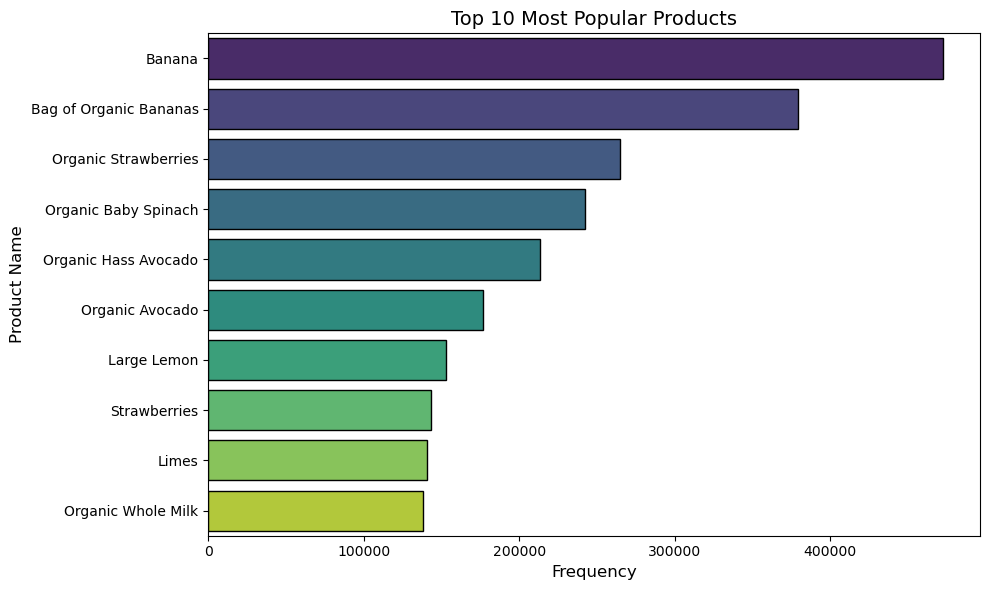

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_counts.values,
    y=product_counts.index,
    hue=product_counts.index,  # Assign `y` to `hue`
    palette="viridis",
    edgecolor="black",
    dodge=False  # Ensure no offset since `hue` is used
)


plt.title('Top 10 Most Popular Products', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend([], [], frameon=False)  # Hide legend since hue is artificial
plt.tight_layout()
plt.show()



In [158]:
prod_with_dept = prod.merge(depart, on="department_id")

# Merge order products with enriched product details
order_data = order_products.merge(prod_with_dept, on="product_id")

# Filter for products in the Bakery department (department_id == 1)
bakery_products = order_data[order_data["department_id"] == 12]

# Get the top 10 products in the Bakery department
top_bakery_products = (
    bakery_products["product_name"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "product_name", "product_name": "count"})
)

# Display the results
print("Top 10 Products in the Meat Seafood Department:")
print(top_bakery_products)

Top 10 Products in the Meat Seafood Department:
                                               count  count
0                  Boneless Skinless Chicken Breasts  50281
1                               Ground Turkey Breast  26721
2                   Boneless Skinless Chicken Breast  22590
3                Uncured Hickory Smoked Sunday Bacon  20775
4                              Organic Beef Hot Dogs  17140
5  Air Chilled Organic Boneless Skinless Chicken ...  16816
6                               Organic Turkey Bacon  15302
7                                      Tilapia Filet  14707
8           Natural Chicken & Sage Breakfast Sausage  14577
9                    Organic Chicken & Apple Sausage  12992


# Reordered Rate by product

In [68]:
reorder_rate = order_data.groupby('product_name')['reordered'].mean().sort_values(ascending=False)

print("Top 10 Products by Reorder Rate:")
print(reorder_rate.head(10))

Top 10 Products by Reorder Rate:
product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Russian River Valley Reserve Pinot Noir     0.900000
Maca Buttercups                             0.900000
Sparking Water                              0.900000
Name: reordered, dtype: float64


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15924\3767045730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


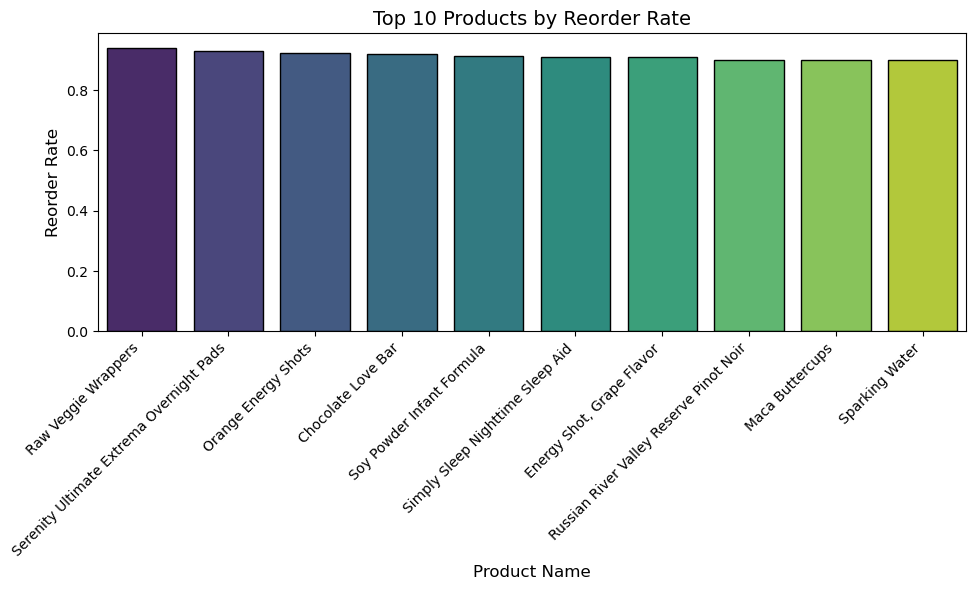

In [69]:
reorder_rate = order_data.groupby('product_name')['reordered'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=reorder_rate.head(10).index,
    y=reorder_rate.head(10).values,
    palette="viridis",
    edgecolor="black"
)
plt.title('Top 10 Products by Reorder Rate', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Reorder Rate', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Order Size Distribution

In [71]:
order_size = order_data.groupby('order_id')['add_to_cart_order'].count()

# Distribution of order sizes
order_size_distribution = order_size.value_counts().sort_index()

print("Order Size Distribution:")
print(order_size_distribution)

Order Size Distribution:
add_to_cart_order
1      156748
2      186993
3      207027
4      222081
5      228330
6      227675
7      220006
8      203374
9      184347
10     165550
11     147461
12     131580
13     116871
14     103683
15      91644
16      81192
17      71360
18      62629
19      54817
20      48096
21      41863
22      36368
23      31672
24      27065
25      23613
26      20283
27      17488
28      15102
29      13033
30      11251
31       9571
32       8035
33       6991
34       6041
35       5164
36       4407
37       3681
38       3169
39       2653
40       2272
41       1978
42       1642
43       1412
44       1227
45       1048
46        895
47        743
48        608
49        563
50        491
51        394
52        348
53        288
54        275
55        224
56        175
57        159
58        165
59        119
60        121
61        100
62         79
63         67
64         57
65         53
66         49
67         44
68         39
69   

In [72]:
# Filter data for add_to_cart_order positions 1 to 5
priority_items = order_data[order_data['add_to_cart_order'].between(1, 5)]

# Count the frequency of each product in positions 1 to 5
priority_item_counts = priority_items['product_name'].value_counts().head(10)

# Display the top 10 staple products
print("Top 10 Staple Products Frequently Added in Positions 1–5:")
print(priority_item_counts)

Top 10 Staple Products Frequently Added in Positions 1–5:
product_name
Banana                    327225
Bag of Organic Bananas    258149
Organic Strawberries      132917
Organic Baby Spinach      115906
Organic Hass Avocado      114121
Organic Avocado            98364
Organic Whole Milk         89453
Strawberries               74215
Organic Raspberries        70232
Large Lemon                67134
Name: count, dtype: int64


## General Insights
Bananas as a Priority:

"Banana" and "Bag of Organic Bananas" are overwhelmingly the top products, suggesting they are staple items for a majority of customers.
Their high frequency indicates they are essentials that customers tend to add first when shopping.
Preference for Organic Products:

Several items in the list are organic, such as "Organic Strawberries," "Organic Baby Spinach," and "Organic Hass Avocado."
This trend indicates that customers value organic produce and prioritize it in their shopping behavior.
Fresh Produce Dominates:

The list is heavily skewed towards fresh produce (e.g., bananas, strawberries, spinach, avocados, lemons).
Customers likely shop for fresh fruits and vegetables first, potentially because these are staples or perishable items.
Dairy and Basics:

"Organic Whole Milk" also appears in the list, reflecting that dairy products are another priority for shoppers.
Essentials like milk and fresh produce are likely part of routine shopping.
Consistency Across Customers:

These products are staples across a wide customer base, as evidenced by their high frequency.
## Implications
For Retailers:

Promotions: These products are ideal for promotions or discounts to drive traffic.
Stocking Priorities: Ensure these items are always in stock to maintain customer satisfaction.
Placement: Position these products prominently in stores or at the top of online shopping categories to simplify access.
For Marketing:

Cross-Selling Opportunities: Bundle these staples with complementary items (e.g., bananas with peanut butter or milk with cereals).
Highlight Organic Trends: Capitalize on the popularity of organic items by expanding offerings or creating targeted campaigns.
For Customer Behavior Analysis:

Habitual Purchases: These products reflect routine and habitual customer behavior, making them reliable indicators for understanding broader purchasing patterns.

## Banana orders

In [75]:
banana_orders = order_data[order_data['product_name'] == 'Banana']

# Count how often "Banana" is the first product in the cart
banana_first_count = (banana_orders['add_to_cart_order'] == 1).sum()

# Total orders containing "Banana"
total_banana_orders = banana_orders.shape[0]

# Proportion of orders where "Banana" is the first product
banana_first_ratio = banana_first_count / total_banana_orders

print(f"'Banana' is the first product in the cart in {banana_first_count} orders.")
print(f"Proportion of orders where 'Banana' is first: {banana_first_ratio:.2%}")

'Banana' is the first product in the cart in 110916 orders.
Proportion of orders where 'Banana' is first: 23.47%


In [76]:
# List of top products (replace with your actual list of product names)
top_products = [
    'Banana',
    'Bag of Organic Bananas',
    'Organic Strawberries',
    'Organic Baby Spinach',
    'Organic Hass Avocado',
    'Organic Avocado',
    'Organic Whole Milk',
    'Strawberries',
    'Organic Raspberries',
    'Large Lemon'
]

# Initialize a results dictionary
first_product_counts = {}

# Loop through each product and calculate first-product statistics
for product in top_products:
    # Filter for rows where the product matches
    product_orders = order_data[order_data['product_name'] == product]
    
    # Count how often the product is the first in the cart
    first_count = (product_orders['add_to_cart_order'] == 1).sum()
    
    # Total orders containing the product
    total_count = product_orders.shape[0]
    
    # Proportion of orders where the product is first
    first_ratio = first_count / total_count if total_count > 0 else 0
    
    # Save results to dictionary
    first_product_counts[product] = {
        'First Count': first_count,
        'Total Orders': total_count,
        'First Ratio': round(first_ratio, 4)  # Rounded to 4 decimal places
    }

# Convert the results into a DataFrame for easy viewing
first_product_df = pd.DataFrame(first_product_counts).T
first_product_df.columns = ['First Count', 'Total Orders', 'First Ratio']

# Display the results
print(first_product_df)


                        First Count  Total Orders  First Ratio
Banana                     110916.0      472565.0       0.2347
Bag of Organic Bananas      78988.0      379450.0       0.2082
Organic Strawberries        27975.0      264683.0       0.1057
Organic Baby Spinach        23543.0      241921.0       0.0973
Organic Hass Avocado        24116.0      213584.0       0.1129
Organic Avocado             22398.0      176815.0       0.1267
Organic Whole Milk          30927.0      137905.0       0.2243
Strawberries                16366.0      142951.0       0.1145
Organic Raspberries         14393.0      137057.0       0.1050
Large Lemon                 12316.0      152657.0       0.0807


# Customer reorder behaviour

In [78]:
# Reorder proportion by user
user_reorder_rate = order_data.groupby('order_id')['reordered'].mean().sort_values(ascending=False)

print("Top 10 Users by Reorder Proportion:")
print(user_reorder_rate.head(10))

Top 10 Users by Reorder Proportion:
order_id
1361422    1.0
2882287    1.0
2882295    1.0
2504561    1.0
515193     1.0
1367092    1.0
2504562    1.0
1991489    1.0
1991497    1.0
2882288    1.0
Name: reordered, dtype: float64


The reorder proportion by user measures the proportion of items that a specific user reordered across all their orders. The values in your example (all 1.0) indicate that these users reordered 100% of the items they purchased. Here’s how to interpret this and evaluate its usefulness:

Interpretation
Value of 1.0 (100% Reordered):

These users exclusively reorder items they’ve previously purchased. They are likely habitual shoppers with fixed preferences.
They don’t explore or purchase new products, sticking only to what they’ve bought before.
Implications for Other Values:

A lower proportion (e.g., 0.5) would indicate users who reorder some items while also trying new ones.
A value closer to 0.0 means a user rarely reorders items, suggesting exploratory shopping behavior or irregular needs.
Is It Helpful?
The reorder proportion by user can be helpful depending on the context:

### Useful in Specific Scenarios:
Targeted Marketing:

**For users with a high reorder proportion:**
Offer loyalty programs or subscriptions for their favorite products.

**For users with a low reorder proportion:**
Suggest new or related products to encourage exploration.
Customer Segmentation:

**Segment customers based on their reorder behavior:**
Habitual shoppers (high proportion).
Exploratory shoppers (low proportion).
Design personalized marketing strategies for each segment.

**Inventory Planning:**

Products reordered by users with high reorder proportions are likely "staples."
Ensure consistent stock levels of these products.
Less Helpful in Some Contexts:
If your goal is to understand new product adoption or exploratory behavior, users with a 1.0 reorder proportion may not provide actionable insights.
It doesn't tell you why a user reorders (e.g., price, preference, necessity).


# Purchase Trends by Day and Hour

In [81]:
orders_by_day = orders['order_dow'].value_counts().sort_index()

# Count orders by hour of the day
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

print("Orders by Day of the Week:")
print(orders_by_day)

print("\nOrders by Hour of the Day:")
print(orders_by_hour)

Orders by Day of the Week:
order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: count, dtype: int64

Orders by Hour of the Day:
order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: count, dtype: int64


### Day of the Week (order_dow):

The column order_dow likely represents days of the week encoded as:

0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday

### Hour of the day

each 0, 1, 2 ... means that time of the day, for example, 0 = 12 am, 1 = 1 am......... 23 = 11 pm


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15924\923744886.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days_of_week, y=day_counts, palette="viridis", edgecolor="black")


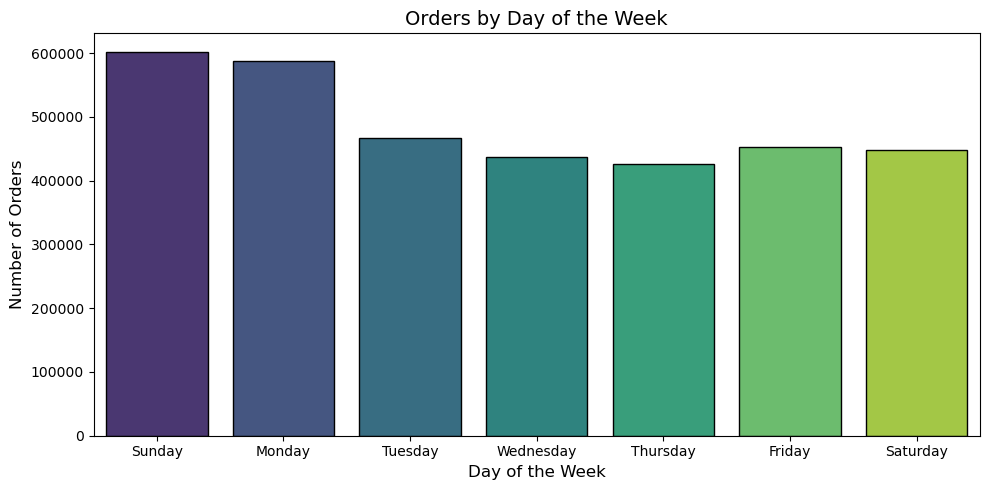

In [83]:
# Re-define the data to avoid errors
orders_by_day = {
    "Sunday": 600905,
    "Monday": 587478,
    "Tuesday": 467260,
    "Wednesday": 436972,
    "Thursday": 426339,
    "Friday": 453368,
    "Saturday": 448761,
}

# Extract day names and counts
days_of_week = list(orders_by_day.keys())
day_counts = list(orders_by_day.values())

# Plot orders by day of the week with day names
plt.figure(figsize=(10, 5))
sns.barplot(x=days_of_week, y=day_counts, palette="viridis", edgecolor="black")
plt.title('Orders by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15924\1864003686.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=day_counts, palette="viridis", edgecolor="black")


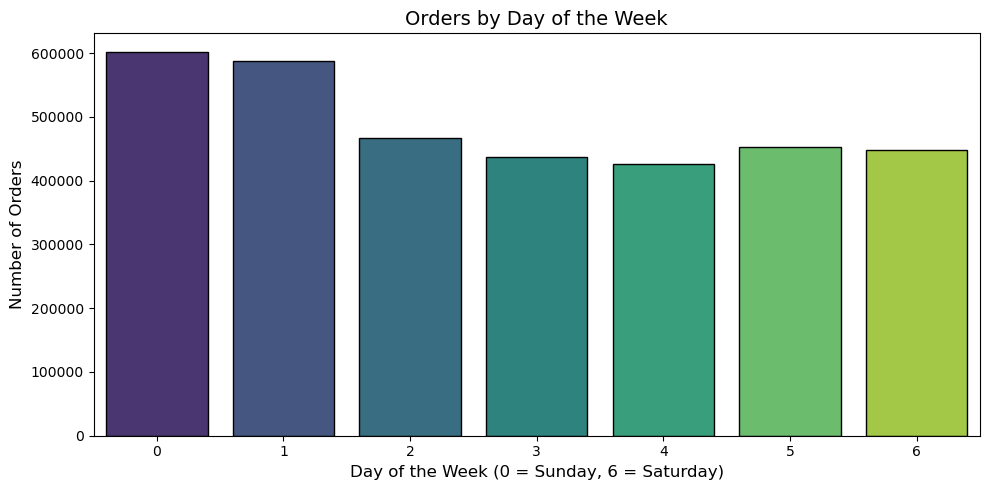

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15924\1864003686.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours, y=hour_counts, palette="viridis", edgecolor="black")


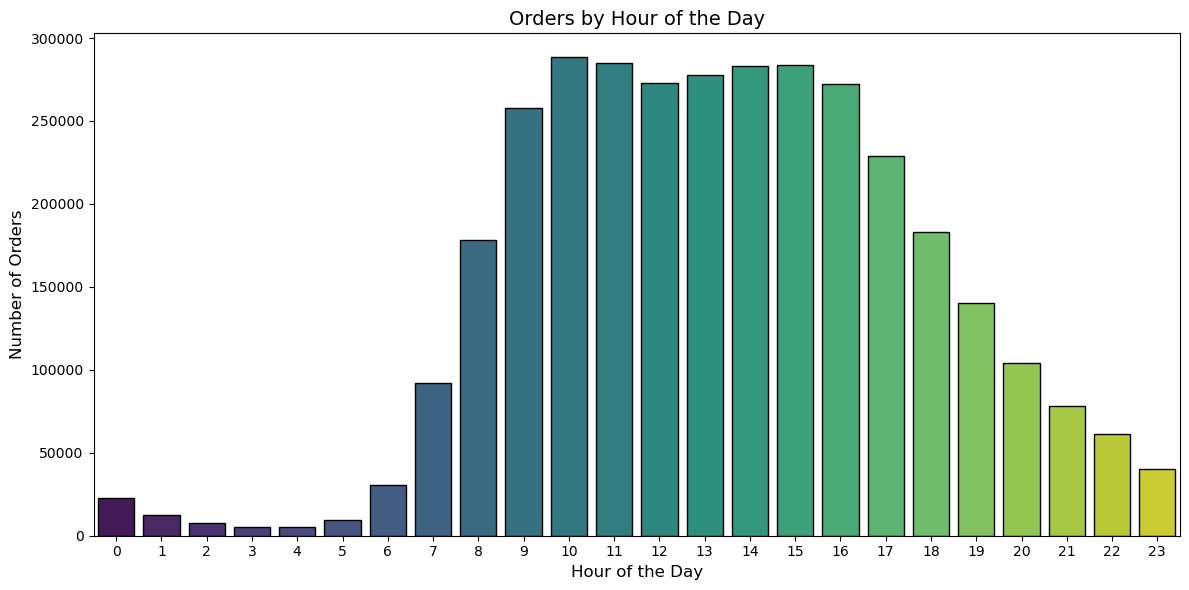

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for orders by day of the week and hour of the day
orders_by_day = {
    0: 600905,
    1: 587478,
    2: 467260,
    3: 436972,
    4: 426339,
    5: 453368,
    6: 448761,
}

orders_by_hour = {
    0: 22758,
    1: 12398,
    2: 7539,
    3: 5474,
    4: 5527,
    5: 9569,
    6: 30529,
    7: 91868,
    8: 178201,
    9: 257812,
    10: 288418,
    11: 284728,
    12: 272841,
    13: 277999,
    14: 283042,
    15: 283639,
    16: 272553,
    17: 228795,
    18: 182912,
    19: 140569,
    20: 104292,
    21: 78109,
    22: 61468,
    23: 40043,
}

# Convert data to sorted lists for plotting
days = list(orders_by_day.keys())
day_counts = list(orders_by_day.values())

hours = list(orders_by_hour.keys())
hour_counts = list(orders_by_hour.values())

# Plot orders by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=days, y=day_counts, palette="viridis", edgecolor="black")
plt.title('Orders by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# Plot orders by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=hours, y=hour_counts, palette="viridis", edgecolor="black")
plt.title('Orders by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
